<a href="https://colab.research.google.com/github/RJthecoder/Disease-Predictioon-using-rbc-And-Pcv-cell-using-ML-/blob/main/TY_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
sympdt = pd.read_csv("/content/medical data.csv")
column_names = sympdt.columns

print(column_names)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [ ]:
# Dropping the "prognosis" column
x = sympdt.drop("prognosis", axis=1)

# Creating an instance of OneHotEncoder
ohe = OneHotEncoder()

# Reshaping column names and applying one-hot encoding
column_names = np.array(x.columns).reshape(-1, 1)
d1 = pd.DataFrame(ohe.fit_transform(column_names).toarray())

print(d1)

     0    1    2    3    4    5    6    7    8    9    ...  122  123  124  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
127  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
128  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
129  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
130  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
131  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     125  126  127  128  129  130  131  
0    0.0  0.0  0.0  0.0  0.0  0.0 

In [ ]:
y = sympdt["prognosis"]

print(y)


0              Fungal infection
1              Fungal infection
2              Fungal infection
3              Fungal infection
4              Fungal infection
                 ...           
4957                       Acne
4958    Urinary tract infection
4959                  Psoriasis
4960                   Impetigo
4961           Fungal infection
Name: prognosis, Length: 4962, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.6)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (1984, 132)
X_test shape: (2978, 132)
Y_train shape: (1984,)
Y_test shape: (2978,)


In [ ]:
scores = []
for k in range(1, 40):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, Y_train)
    y_pred = rfc.predict(X_test)
    score = accuracy_score(Y_test, y_pred)
    scores.append(score)
    print(f"For n_estimators={k}, accuracy score: {score}")

For n_estimators=1, accuracy score: 0.9872397582269979
For n_estimators=2, accuracy score: 0.9902619207521827
For n_estimators=3, accuracy score: 0.9996642041638684
For n_estimators=4, accuracy score: 0.9996642041638684
For n_estimators=5, accuracy score: 0.9979852249832102
For n_estimators=6, accuracy score: 0.9922766957689725
For n_estimators=7, accuracy score: 0.9996642041638684
For n_estimators=8, accuracy score: 0.9976494291470785
For n_estimators=9, accuracy score: 0.9996642041638684
For n_estimators=10, accuracy score: 0.9996642041638684
For n_estimators=11, accuracy score: 0.9996642041638684
For n_estimators=12, accuracy score: 0.9996642041638684
For n_estimators=13, accuracy score: 0.9976494291470785
For n_estimators=14, accuracy score: 0.9996642041638684
For n_estimators=15, accuracy score: 0.9996642041638684
For n_estimators=16, accuracy score: 0.9996642041638684
For n_estimators=17, accuracy score: 0.9996642041638684
For n_estimators=18, accuracy score: 0.9996642041638684
F

In [ ]:
unique_scores = np.unique(np.array(scores))
print(unique_scores)

[0.9838818  0.98455339 0.99764943 0.99798522 0.9996642 ]


In [ ]:
randommodel = RandomForestClassifier(n_estimators=3)
randommodel.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=3)

In [ ]:
nn = np.random.randint(0, 2, size=132)
print(nn)

[0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1
 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0
 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0]


In [ ]:
# randommodel.predict([nn])
# randommodel.predict(nn.reshape(1, -1))
prediction = randommodel.predict(nn.reshape(1, -1))
print(prediction)

['(vertigo) Paroymsal  Positional Vertigo']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
zeros_array = np.zeros(2)
print(zeros_array)

[0. 0.]


In [ ]:
flo=[3,6,8,4,9]
flo

[3, 6, 8, 4, 9]

In [ ]:
jj = np.array(np.zeros(134))
print(jj)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
for i in range(10):
    if i in flo:
        jj[i] = 1

print(jj)



[0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
decisionsampmodel = DecisionTreeClassifier(criterion='gini', max_depth=5)
decisionsampmodel.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
score_train = decisionsampmodel.score(X_train, Y_train)
print("Training accuracy: ", score_train)

Training accuracy:  0.18800403225806453


In [ ]:
decisionsampmodel.predict([nn])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [ ]:
deciparam = {
    "max_depth": [3, None],
    "max_features": range(1, 11),
    "min_samples_split": range(2, 11),
    "criterion": ["gini", "entropy"]
}

random_search_dec = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=deciparam, n_iter=10, cv=5)
random_search_dec.fit(x, y)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [ ]:
deciparam = {
    "max_depth": [3, None],
    "max_features": range(1, 11),
    "min_samples_split": range(2, 11),
    "criterion": ["gini", "entropy"]
}

random_search_dec = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=deciparam,
    n_iter=10,
    cv=5
)

random_search_dec.fit(x, y)

print("Best hyperparameters for Decision Tree Classifier: ")
print(random_search_dec.best_params_)


Best hyperparameters for Decision Tree Classifier: 
{'min_samples_split': 3, 'max_features': 4, 'max_depth': None, 'criterion': 'entropy'}


In [ ]:
best_estimator = random_search_dec.best_estimator_
print("Best estimator for Decision Tree Classifier:")
print(best_estimator)

Best estimator for Decision Tree Classifier:
DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_split=3)


In [ ]:
random_search_dec.best_params_

{'min_samples_split': 3,
 'max_features': 4,
 'max_depth': None,
 'criterion': 'entropy'}

In [ ]:
best_score = random_search_dec.best_score_
print("Best score for Decision Tree Classifier:")
print(best_score)

Best score for Decision Tree Classifier:
1.0


In [ ]:
decisionmodel=DecisionTreeClassifier(criterion='entropy')
decisionmodel.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
accuracy = decisionmodel.score(X_train, Y_train)
print("Accuracy on training data:", accuracy)


Accuracy on training data: 1.0


In [ ]:
# decisionmodel.predict([nn])
nn = nn.reshape(1, -1)
print(nn)



[[0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1
  1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
  0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1
  0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0]]


In [ ]:
score_train = decisionmodel.score(X_train, Y_train)
print("Training accuracy: ", score_train)

Training accuracy:  1.0


In [ ]:
def calculate_entropy(data):
    target_col = data['prognosis']
    class_counts = target_col.value_counts()
    class_probabilities = class_counts / len(target_col)
    entropy = -sum(class_probabilities * np.log2(class_probabilities))
    return entropy

# Calculate entropy
entropy = calculate_entropy(sympdt)
print("Entropy:", entropy)

Entropy: 5.357550835774793


In [ ]:
kparam= {"n_neighbors": range(5,14),
          "leaf_size": range(20, 40),
          "metric": ["minkowski", "manhattan"]}
random_search_k = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=kparam, n_iter=10, cv=5)
random_search_k.fit(x,y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': range(20, 40),
                                        'metric': ['minkowski', 'manhattan'],
                                        'n_neighbors': range(5, 14)})

In [ ]:
random_search_k.best_estimator_

KNeighborsClassifier(leaf_size=33, metric='manhattan', n_neighbors=8)

In [ ]:
modelsvm=SVC(kernel="poly",C=10,degree=5)
modelsvm.fit(X_train,Y_train)
modelsvm.score(X_train,Y_train)
Y_pred = modelsvm.predict(X_test)
recall_score(Y_test, Y_pred, average='macro')

1.0

In [ ]:

kmodel=KNeighborsClassifier(leaf_size=29, n_neighbors=10)
kmodel.fit(X_train,Y_train)
print()

In [ ]:
kmeansCparam= {"n_clusters": range(10,35),
          "max_iter": range(1000, 1005)}
random_search_kC = RandomizedSearchCV(KMeans(), param_distributions=kmeansCparam, n_iter=10, cv=5)
random_search_kC.fit(x)
print(random_search_kC.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

{'n_clusters': 34, 'max_iter': 1004}


In [ ]:
random_search_kC.best_params_

{'n_clusters': 34, 'max_iter': 1004}

In [ ]:
Y_pred = randommodel.predict(X_test)
recall_score(Y_test, Y_pred, average='macro')

0.9956598252610301

In [ ]:
from sklearn.metrics import accuracy_score

Y_pred = randommodel.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy score:", accuracy)


Accuracy score: 0.9956346541302887


In [ ]:
userinp=56

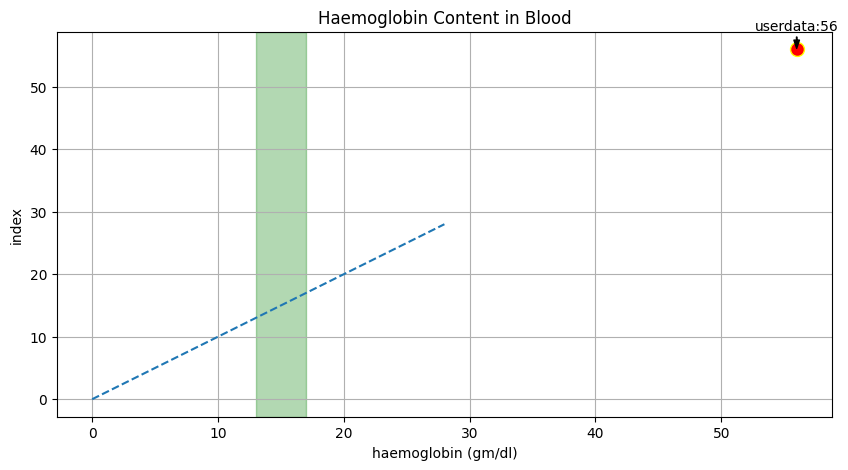

In [ ]:
userinp=56
haemrang=range(0,29)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(0,29),haemrang,linestyle = '--')
plt.plot(userinp,userinp, marker="o", markersize=10, markeredgecolor="yellow", markerfacecolor="red")
plt.annotate('userdata:{0}'.format(userinp),ha="center" , xy=(userinp, userinp), xytext=(userinp, userinp+3),arrowprops=dict(facecolor='black', shrink=0.05,width=0.3,headlength=6,headwidth=4))
plt.axvspan(13,17,color="green", alpha=0.3)
plt.title("Haemoglobin Content in Blood")
plt.xlabel("haemoglobin (gm/dl)")
plt.ylabel("index")
plt.show()

In [ ]:
userinp=500

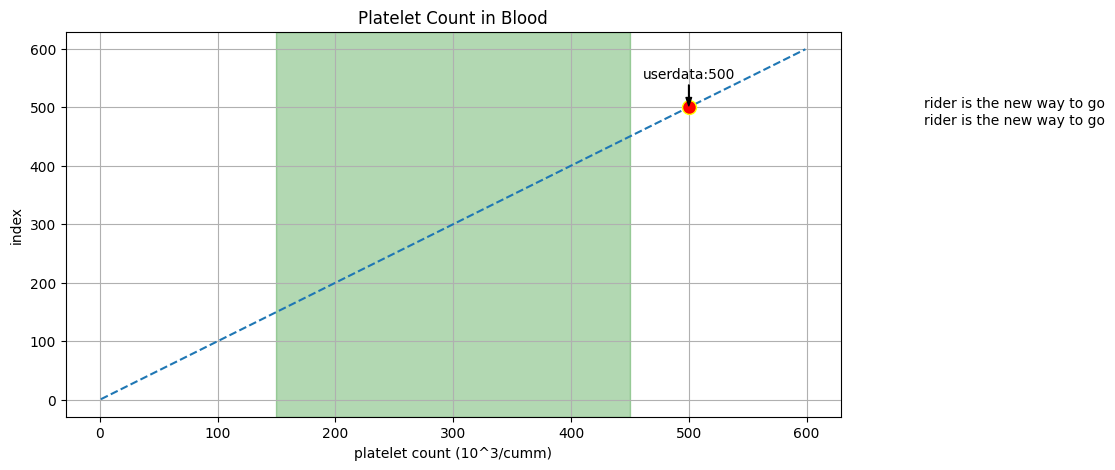

In [ ]:
userinp=500
pletrang=range(1,600)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,600),pletrang,linestyle = '--')
plt.plot(userinp,userinp, marker="o", markersize=10, markeredgecolor="yellow", markerfacecolor="red")
plt.annotate('userdata:{0}'.format(userinp),ha="center" ,xy=(userinp, userinp), xytext=(userinp, userinp+50),arrowprops=dict(facecolor='black', shrink=0.05,width=0.3,headlength=6,headwidth=4))
plt.axvspan(150,450,color="green", alpha=0.3)
plt.text(700,500,"rider is the new way to go")
plt.text(700,470,"rider is the new way to go")
plt.title("Platelet Count in Blood")
plt.xlabel("platelet count (10^3/cumm)")
plt.ylabel("index")
plt.show()

In [ ]:
userinp=78

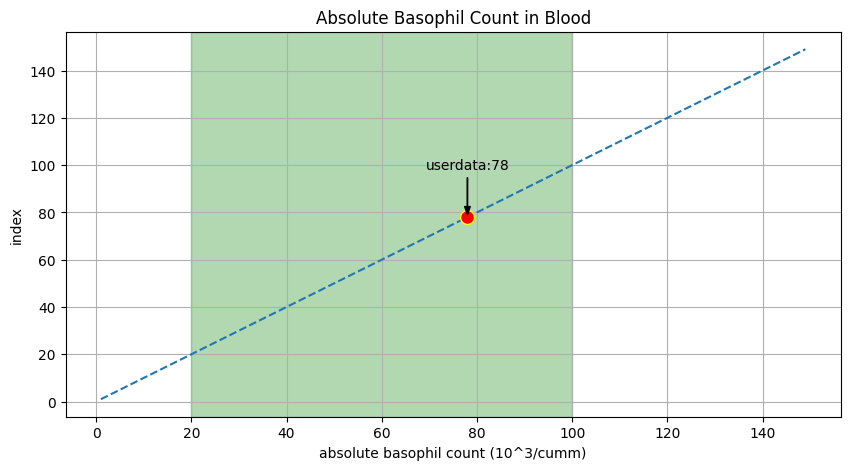

In [ ]:
userinp=78
pletrang=range(1,150)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,150),pletrang,linestyle = '--')
plt.plot(userinp,userinp, marker="o", markersize=10, markeredgecolor="yellow", markerfacecolor="red")
plt.annotate('userdata:{0}'.format(userinp), xy=(userinp, userinp),ha="center" , xytext=(userinp, userinp+20),arrowprops=dict(facecolor='black', shrink=0.05,width=0.3,headlength=6,headwidth=4))
plt.axvspan(20,100,color="green", alpha=0.3)
plt.title("Absolute Basophil Count in Blood")
plt.xlabel("absolute basophil count (10^3/cumm)")
plt.ylabel("index")
plt.show()


In [ ]:
userinp=68

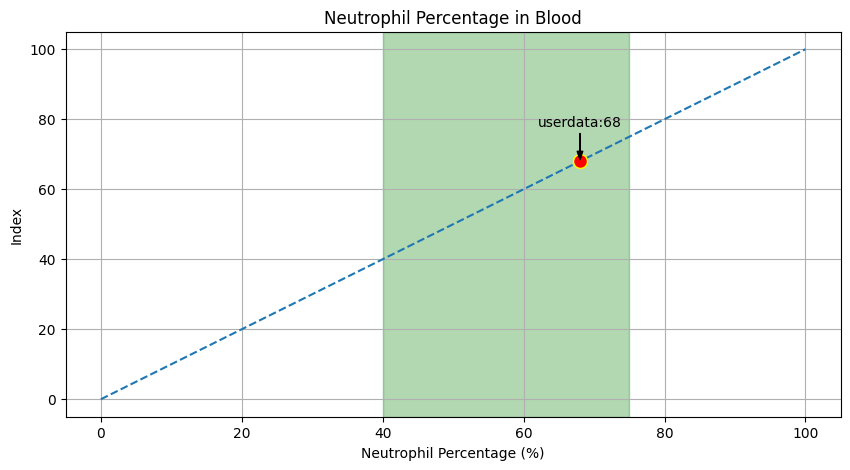

In [ ]:
userinp=68
neutrorang=range(0,101)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(0,101),neutrorang,linestyle = '--')
plt.plot(userinp,userinp, marker="o", markersize=10, markeredgecolor="yellow", markerfacecolor="red")
plt.annotate('userdata:{0}'.format(userinp), xy=(userinp, userinp),ha="center" , xytext=(userinp, userinp+10),arrowprops=dict(facecolor='black', shrink=0.05,width=0.3,headlength=6,headwidth=4))
plt.axvspan(40,75,color="green", alpha=0.3)
plt.title("Neutrophil Percentage in Blood")
plt.xlabel("Neutrophil Percentage (%)")
plt.ylabel("Index")
plt.show()

In [ ]:
userinp=44.2

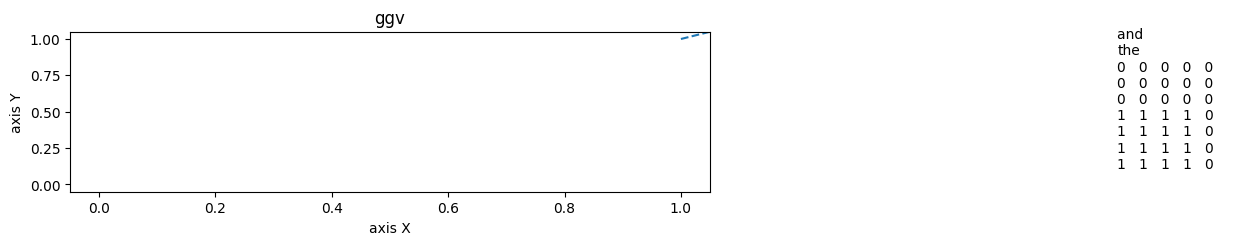

In [ ]:
userinp=44.2
import numpy as np
import pylab as pl
fig = pl.figure(figsize=(16,4))
ax =  fig.add_axes([0.1, 0.2, 0.4, 0.4])
ax.plot(range(1,150),range(1,150),linestyle = '--')
ax.plot(userinp,userinp, marker="o", markersize=10, markeredgecolor="yellow", markerfacecolor="red")
ax.annotate('userdata:{0}'.format(userinp), xy=(userinp, userinp),ha="center" , xytext=(userinp, userinp+20),arrowprops=dict(facecolor='black', shrink=0.05,width=0.3,headlength=6,headwidth=4))
ax.axvspan(50,70,color="green", alpha=0.3)
ax.set_title('ggv')
ax.set_xlabel('axis X')
ax.set_ylabel('axis Y')
ax.axis([-0.05, 1.05, -0.05, 1.05])
data = ('and \n'
'the\n'
'0   0   0   0   0   \n'
'0   0   0   0   0   \n'
'0   0   0   0   0   \n'
'1   1   1   1   0   \n'
'1   1   1   1   0   \n'
'1   1   1   1   0   \n'
'1   1   1   1   0   \n')
pl.text(1.75,0,data)
pl.show()

In [ ]:
np.zeros(4)

array([0., 0., 0., 0.])

In [ ]:
userinp=52

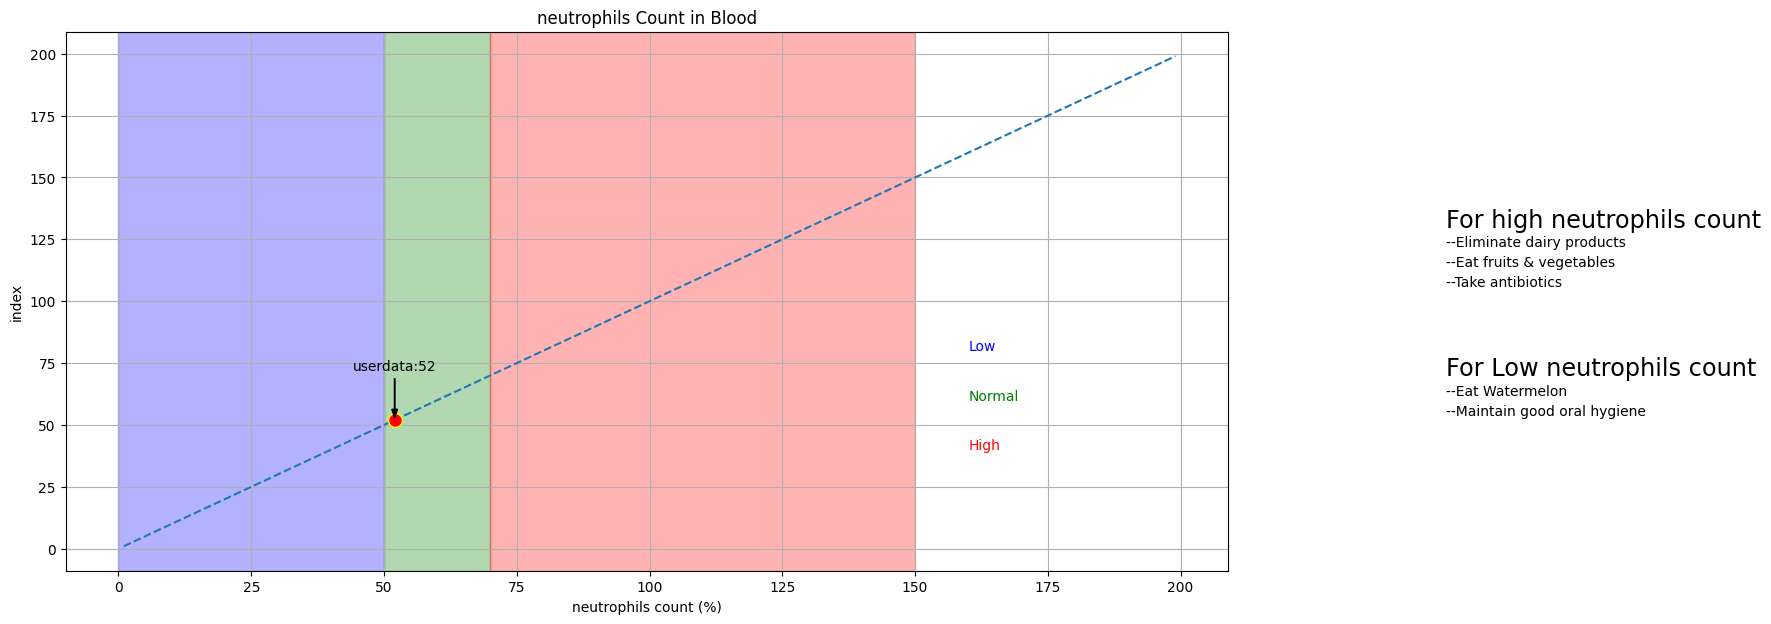

In [ ]:

pletrang=range(1,200)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,200),pletrang,linestyle = '--')
plt.plot(userinp,userinp, marker="o", markersize=10, markeredgecolor="yellow", markerfacecolor="red")
plt.annotate('userdata:{0}'.format(userinp), xy=(userinp, userinp),ha="center" , xytext=(userinp, userinp+20),arrowprops=dict(facecolor='black', shrink=0.05,width=0.3,headlength=6,headwidth=4))
plt.axvspan(50,70,color="green", alpha=0.3)
plt.axvspan(0,50,color="blue", alpha=0.3)
plt.axvspan(70,150,color="red", alpha=0.3)
plt.text(160,80,"Low",c="blue")
plt.text(160,60,"Normal",c="green")
plt.text(160,40,"High",c="red")
plt.text(250, 130,"For high neutrophils count", fontsize = 'xx-large' )
plt.text(250, 122,"--Eliminate dairy products" )
plt.text(250, 114,"--Eat fruits & vegetables" )
plt.text(250, 106,"--Take antibiotics" )

plt.text(250, 70,"For Low neutrophils count", fontsize = 'xx-large' )
plt.text(250, 62,"--Eat Watermelon" )
plt.text(250, 54,"--Maintain good oral hygiene" )
plt.title("neutrophils Count in Blood")
plt.xlabel("neutrophils count (%)")
plt.ylabel("index")
plt.show()

In [ ]:
userinp= 44

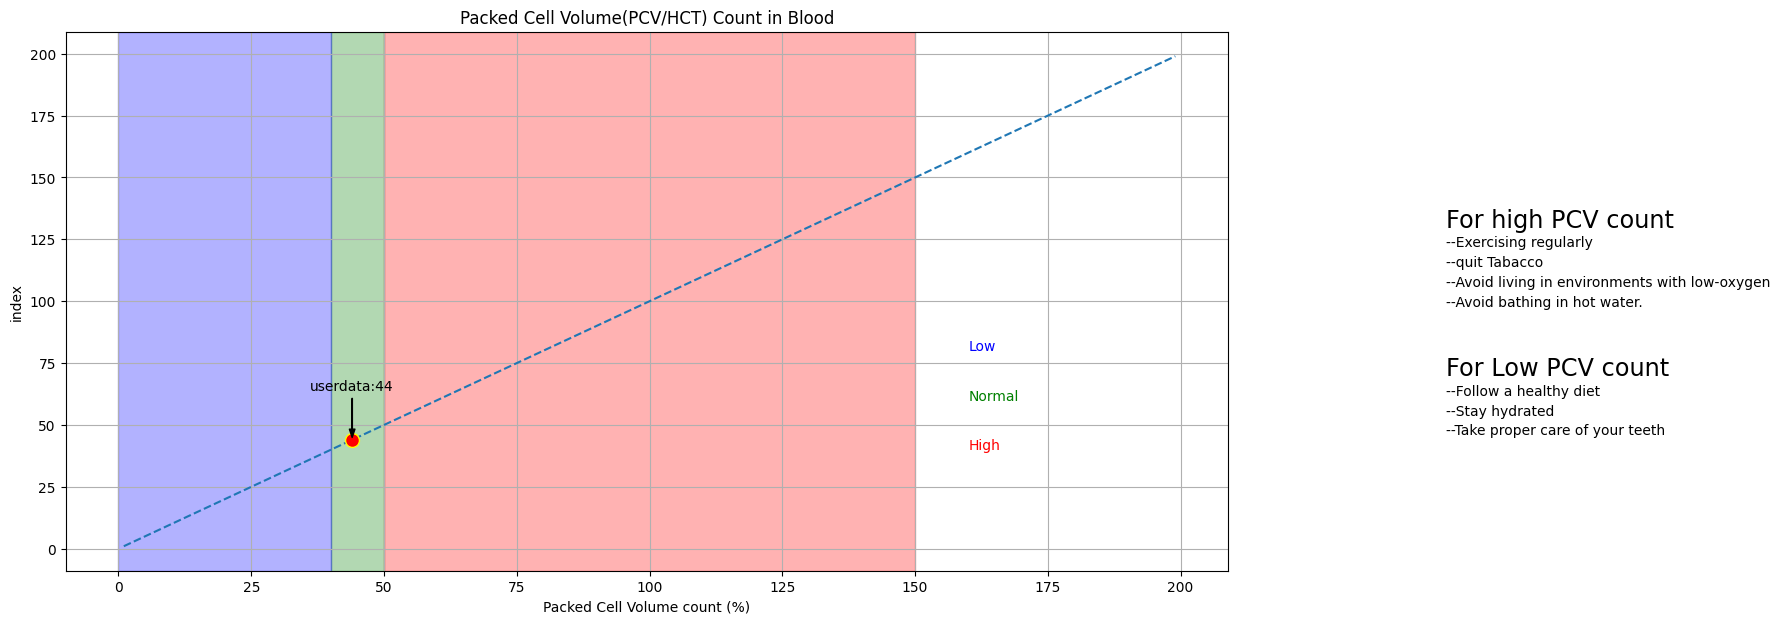

In [ ]:

pletrang=range(1,200)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,200),pletrang,linestyle = '--')
plt.plot(userinp,userinp, marker="o", markersize=10, markeredgecolor="yellow", markerfacecolor="red")
plt.annotate('userdata:{0}'.format(userinp), xy=(userinp, userinp),ha="center" , xytext=(userinp, userinp+20),arrowprops=dict(facecolor='black', shrink=0.05,width=0.3,headlength=6,headwidth=4))
plt.axvspan(40,50,color="green", alpha=0.3)
plt.axvspan(0,40,color="blue", alpha=0.3)
plt.axvspan(50,150,color="red", alpha=0.3)
plt.text(160,80,"Low",c="blue")
plt.text(160,60,"Normal",c="green")
plt.text(160,40,"High",c="red")

plt.text(250, 130,"For high PCV count", fontsize = 'xx-large' )

plt.text(250, 122,"--Exercising regularly" )
plt.text(250, 114,"--quit Tabacco" )
plt.text(250, 106,"--Avoid living in environments with low-oxygen" )
plt.text(250, 98,"--Avoid bathing in hot water." )
plt.text(250, 70,"For Low PCV count", fontsize = 'xx-large' )
plt.text(250, 62,"--Follow a healthy diet" )
plt.text(250, 54,"--Stay hydrated" )
plt.text(250, 46,"--Take proper care of your teeth" )

plt.title("Packed Cell Volume(PCV/HCT) Count in Blood")
plt.xlabel("Packed Cell Volume count (%)")
plt.ylabel("index")
plt.show()

In [ ]:
userinp = 5.6

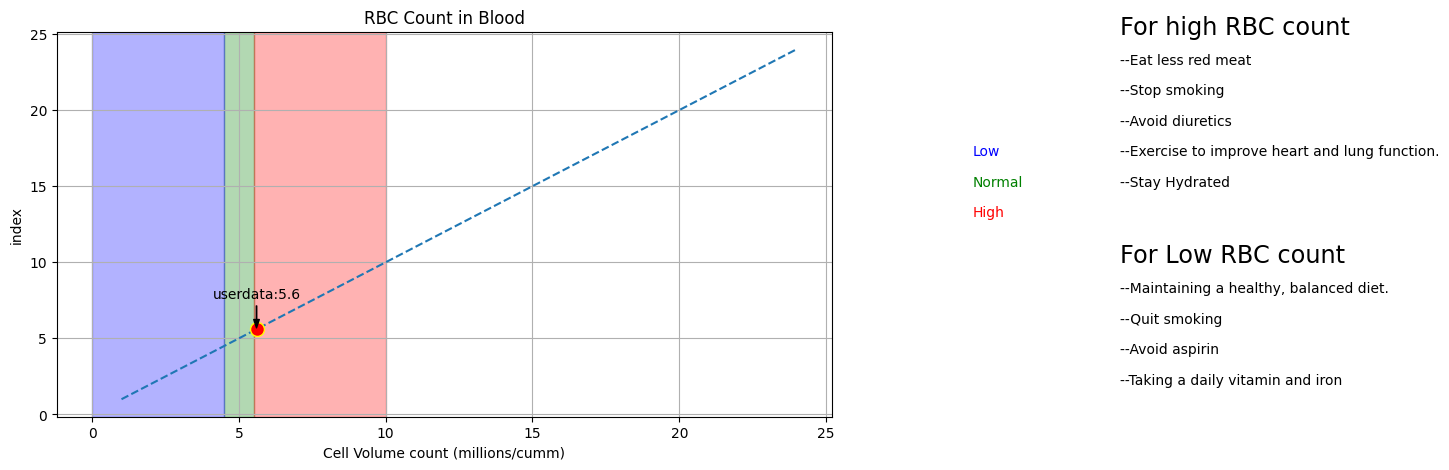

In [ ]:
pletrang=range(1,25)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,25),pletrang,linestyle = '--')
plt.plot(userinp,userinp, marker="o", markersize=10, markeredgecolor="yellow", markerfacecolor="red")
plt.annotate('userdata:{0}'.format(userinp), xy=(userinp, userinp),ha="center" , xytext=(userinp, userinp+2),arrowprops=dict(facecolor='black', shrink=0.05,width=0.3,headlength=6,headwidth=4))
plt.axvspan(4.5,5.5,color="green", alpha=0.3)
plt.axvspan(0,4.5,color="blue", alpha=0.3)
plt.axvspan(5.5,10,color="red", alpha=0.3)
plt.text(30,17,"Low",c="blue")
plt.text(30,15,"Normal",c="green")
plt.text(30,13,"High",c="red")
plt.text(35, 25,"For high RBC count", fontsize = 'xx-large' )
plt.text(35, 23,"--Eat less red meat" )
plt.text(35, 21,"--Stop smoking" )
plt.text(35, 19,"--Avoid diuretics" )
plt.text(35, 17,"--Exercise to improve heart and lung function." )
plt.text(35, 15,"--Stay Hydrated" )
plt.text(35, 10,"For Low RBC count", fontsize = 'xx-large' )
plt.text(35, 8,"--Maintaining a healthy, balanced diet." )
plt.text(35, 6,"--Quit smoking" )
plt.text(35, 4,"--Avoid aspirin" )
plt.text(35, 2,"--Taking a daily vitamin and iron" )
plt.title("RBC Count in Blood")
plt.xlabel("Cell Volume count (millions/cumm)")
plt.ylabel("index")
plt.show()

In [ ]:
def calculate_entropy(data):
    target_col = data['prognosis']
    class_counts = target_col.value_counts()
    class_probabilities = class_counts / len(target_col)
    entropy = -sum(class_probabilities * np.log2(class_probabilities))
    return entropy

# Calculate entropy
entropy = calculate_entropy(sympdt)
print("Entropy:", entropy)

Entropy: 5.357550835774793


In [ ]:
total_instances = len(y)
unique_classes = y.unique()
gini_index = 0
# Calculate the Gini Index for each class
for class_label in unique_classes:
    class_instances = len(y[y == class_label])
    class_probability = class_instances / total_instances
    gini_index += class_probability ** 2

# Calculate the weighted Gini Index
gini_index = 1 - gini_index

print("Gini Index:", gini_index)

Gini Index: 0.9756097164731686


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[62  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  0  0 ...  0  0 69]]


In [ ]:
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 score: ", f1)

F1 score:  0.9956209011187072


In [ ]:
Y_pred = randommodel.predict(X_test)

In [ ]:
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')

print("Precision: ", precision)
print("Recall: ", recall)

Precision:  0.9959071546939819
Recall:  0.9956598252610301


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Split dataset into train and test sets

# Fit Decision Tree classifier to the training data
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = dt_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Generate confusion matrix and classification report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print("Confusion matrix:\n", cm)
print("Classification report:\n", cr)


Accuracy: 99.56%
Confusion matrix:
 [[62  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  0  0 ...  0  0 63]]
Classification report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        62
                                   AIDS       1.00      1.00      1.00        71
                                   Acne       1.00      1.00      1.00        77
                    Alcoholic hepatitis       1.00      1.00      1.00        81
                                Allergy       1.00      1.00      1.00        74
                              Arthritis       1.00      1.00      1.00        74
                       Bronchial Asthma       1.00      1.00      1.00        71
                   Cervical spondylosis       1.00      1.00      1.00        75
                            Chicken pox       0.92    

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset


# Split dataset into features and target variable
X = sympdt.iloc[:, :-1]
y = sympdt.iloc[:, -1]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier and fit the model to the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions using KNN classifier
y_pred_knn = knn.predict(X_test)

# Calculate accuracy and confusion matrix for KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Initialize SVM classifier and fit the model to the training data
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions using SVM classifier
y_pred_svm = svm.predict(X_test)

# Calculate accuracy and confusion matrix for SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Initialize Decision Tree classifier and fit the model to the training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions using Decision Tree classifier
y_pred_dt = dt.predict(X_test)

# Calculate accuracy and confusion matrix for Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Initialize Random Forest classifier and fit the model to the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions using Random Forest classifier
y_pred_rf = rf.predict(X_test)

# Calculate accuracy and confusion matrix for Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print accuracy and confusion matrix for each classifier
print("KNN Accuracy: ", accuracy_knn)
print("KNN Confusion Matrix: \n", cm_knn)

print("SVM Accuracy: ", accuracy_svm)
print("SVM Confusion Matrix: \n", cm_svm)

print("Decision Tree Accuracy: ", accuracy_dt)
print("Decision Tree Confusion Matrix: \n", cm_dt)

print("Random Forest Accuracy: ", accuracy_rf)
print("Random Forest Confusion Matrix: \n", cm_rf)


KNN Accuracy:  1.0
KNN Confusion Matrix: 
 [[17  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 25]]
SVM Accuracy:  1.0
SVM Confusion Matrix: 
 [[17  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 25]]
Decision Tree Accuracy:  1.0
Decision Tree Confusion Matrix: 
 [[17  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 25]]
Random Forest Accuracy:  1.0
Random Forest Confusion Matrix: 
 [[17  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 25]]


In [ ]:
print(sympdt.shape)


(4962, 133)


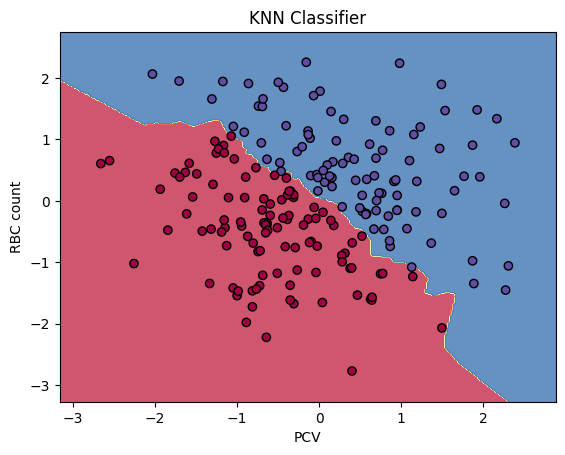

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate some sample data
np.random.seed(0)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Fit a KNN classifier to the data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a meshgrid of points to classify
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class of each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('PCV')
plt.ylabel('RBC count')
plt.title('KNN Classifier')
plt.show()


<ipython-input-64-13839bfd3444>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (X[:, 0] > 0).astype(np.int)


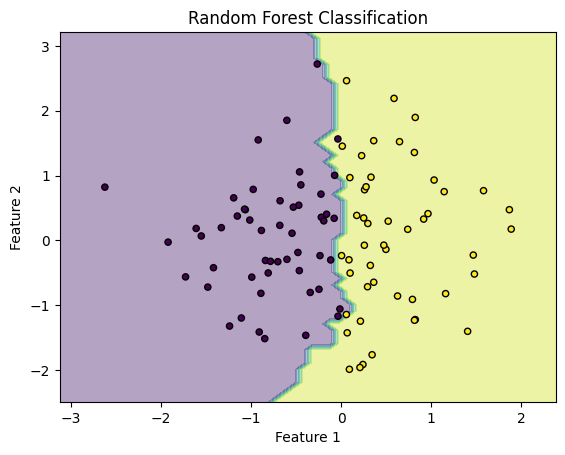

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate some random data
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] > 0).astype(np.int)

# Create a KNN classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Classification')
plt.show()


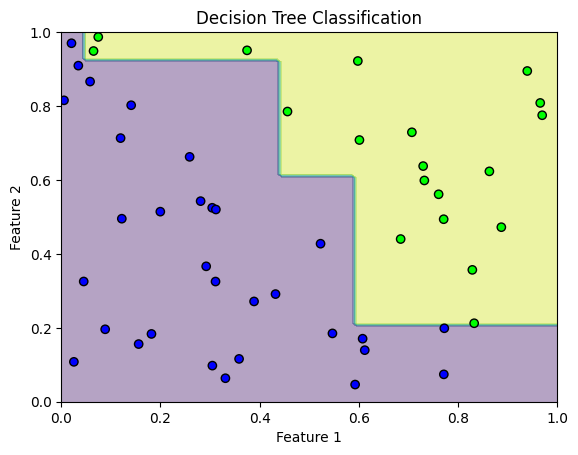

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data for binary classification
np.random.seed(42)
X = np.random.rand(50, 2)
y = np.where(X[:, 0] + X[:, 1] > 1, 1, 0)

# Fit a decision tree classifier to the data
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Define a grid of points to visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the decision boundary and the sample data
plt.contourf(xx, yy, zz, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Classification')
plt.show()


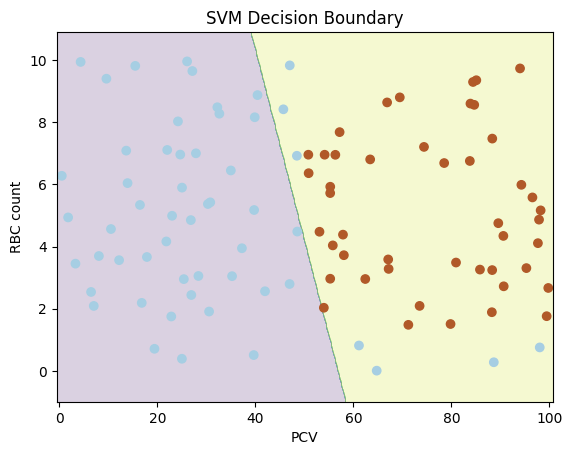

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate sample medical data
sympdt = np.random.rand(100, 2) * 100
sympdt[:, 1] *= 0.1

# Extract the PCV and RBC count columns from the data
pcv = sympdt[:, 0]
rbc = sympdt[:, 1]

# Generate labels for the data based on arbitrary threshold values
labels = np.array([1 if (p > 50 and r > 1) else 0 for p, r in zip(pcv, rbc)])

# Train an SVM model using the data and labels
model = svm.SVC(kernel='linear', C=1)
model.fit(sympdt, labels)

# Create a meshgrid to plot the decision boundary
x_min, x_max = sympdt[:, 0].min() - 1, sympdt[:, 0].max() + 1
y_min, y_max = sympdt[:, 1].min() - 1, sympdt[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(pcv, rbc, c=labels, cmap=plt.cm.Paired)
plt.xlabel('PCV')
plt.ylabel('RBC count')
plt.title('SVM Decision Boundary')
plt.show()


<ipython-input-67-94157ff39c37>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


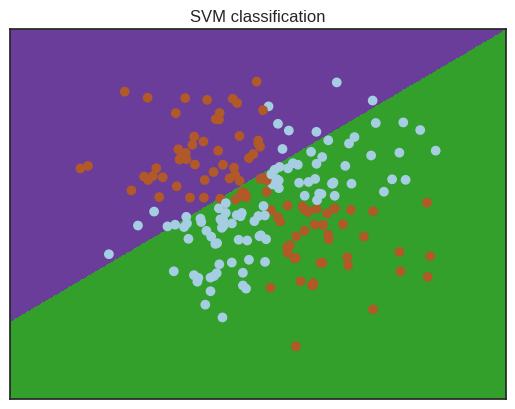

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
plt.style.use('seaborn-white')

# Generate some random data
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Fit the SVM model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# Create a mesh to plot in
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(facecolor='white')
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVM classification')
plt.show()


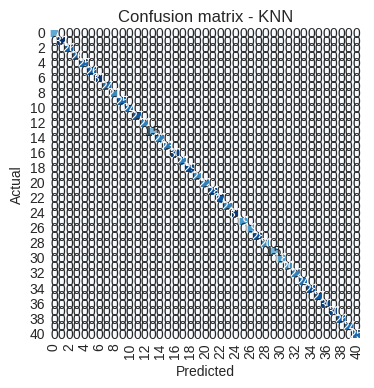

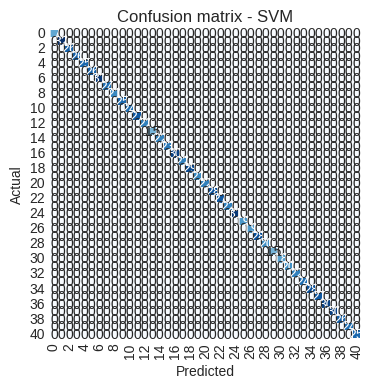

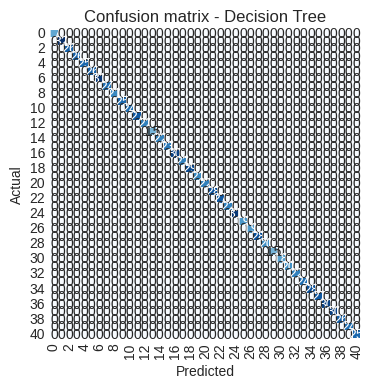

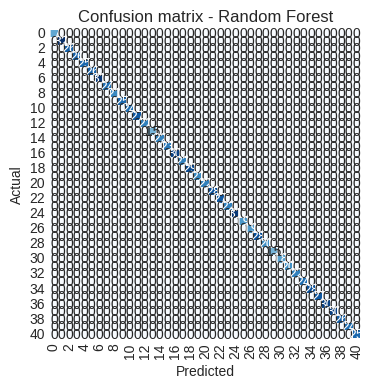

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for KNN classifier
plt.figure(figsize=(4,4))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - KNN')

# Plot confusion matrix for SVM classifier
plt.figure(figsize=(4,4))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - SVM')

# Plot confusion matrix for Decision Tree classifier
plt.figure(figsize=(4,4))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - Decision Tree')

# Plot confusion matrix for Random Forest classifier
plt.figure(figsize=(4,4))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - Random Forest')

plt.show()
